In [291]:
import os
os.environ['KAGGLE_CONFIG_DIR']="~/.kaggle"

In [292]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import random 
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)


```python
Exploratory Data analaysis

```

In [293]:
df= pd.read_csv('train.csv')
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

Label Encoding of Sex Feature  

F -> 0
M->2
I->1


In [294]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(df.columns)
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()
#rename the columns named whole weight.1 as ['id','Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
# 'Viscera weight', 'Shell weight']
#rename the column wholeweight 1 as Shucked weight
#do it
#df.drop(axis=1, columns=['id'], inplace=True)
df.rename(columns = {'Whole weight.1':'Shucked weight'}, inplace = True)
df.rename(columns = {'Whole weight.2':'Viscera weight'}, inplace = True)
#add more columns like freq(Shell_weight) in the dataframe 
print(df.columns)
#df.drop(axis=1,columns=['freq(Shell weight)'],inplace=True)
df.head()

#add a column equal to (Length-Shell_weight) and name it as length- shell wt 
df['Length-Shell weight'] = df['Length'] - df['Shell weight']
df['Whole_ weight + Shell_weight ']= df['Whole weight'] + df['Shell weight']
df['Length/Shell Weight']= df['Length']/ df['Shell weight']
#make the rings as the last column of the dataframe
df['Rings'] = df.pop('Rings')

df.describe()



Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')
Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Length-Shell weight,Whole_ weight + Shell_weight,Length/Shell Weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,1.050014,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,0.291201,1.014933,3.524329,9.696794
std,26158.441658,0.795174,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,0.053677,0.584234,3.599805,3.176221
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,-0.285000,0.003500,0.716418,1.000000
25%,22653.500000,0.000000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,0.267750,0.545000,1.950000,8.000000
50%,45307.000000,1.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,0.303000,1.030500,2.431818,9.000000
75%,67960.500000,2.000000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,0.326000,1.376500,3.701904,11.000000
max,90614.000000,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,0.527000,3.722500,110.000000,29.000000


Added some dependent features in the table 

Length Plot 

90615
90615


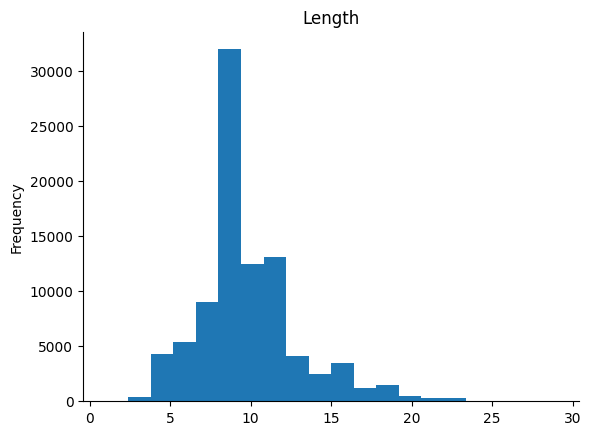

In [295]:
from matplotlib import pyplot as plt
df['Rings'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)
df.dropna(inplace=True)
df.describe()
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(len(y))
print(len(X))
#sequential feauture selection 
from sklearn.feature_selection import SequentialFeatureSelector

72492
72492


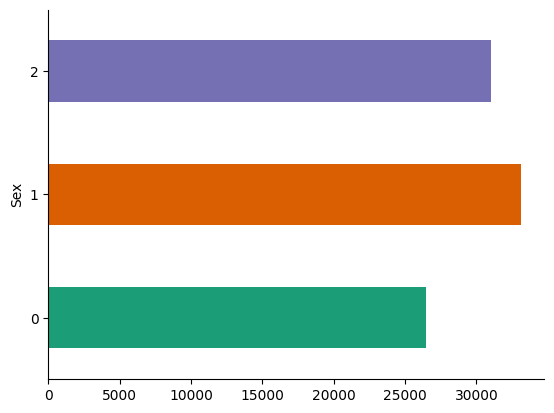

In [296]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
# first divide the train set into train set and val
from sklearn.model_selection import train_test_split
#X=df[['Sex','Length','Whole weight','Shell weight']]
#make X equal to all columns except the last columns 
X=df.iloc[:,:-1]
y=df['Rings']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print(len(y_train))
print(len(X_train))
RMSE_values={}
abs_values={}

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight',
       'Length-Shell weight', 'Whole_ weight + Shell_weight ',
       'Length/Shell Weight'],
      dtype='object')


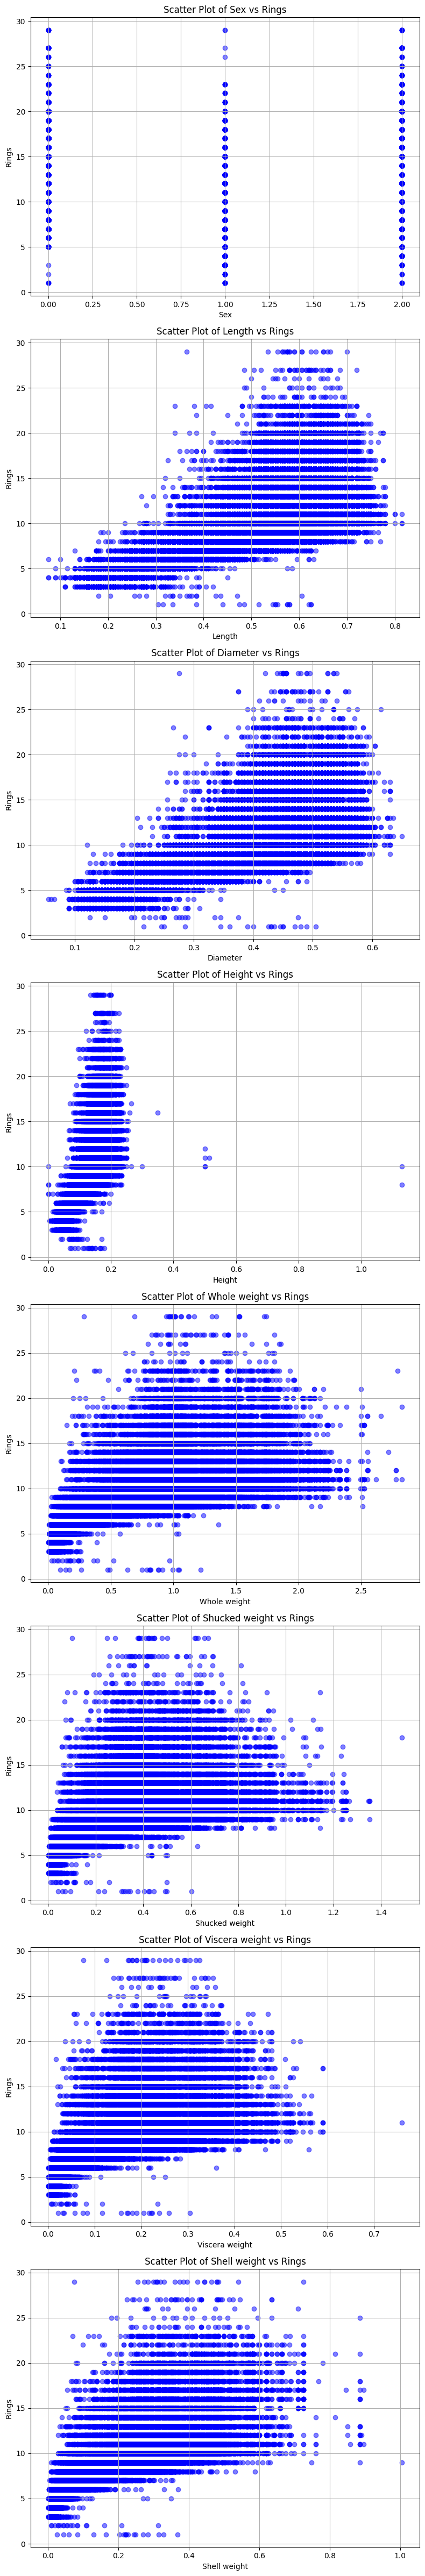

In [297]:
from matplotlib import pyplot as plt
import seaborn as sns
variables_to_plot = [ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Plotting the scatter plots
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(8, 6*len(variables_to_plot)))
print(X_train.columns)
for i, var in enumerate(variables_to_plot):
    axes[i].scatter(X_train[var],y_train, color='blue', alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {var} vs Rings')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rings')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [15]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


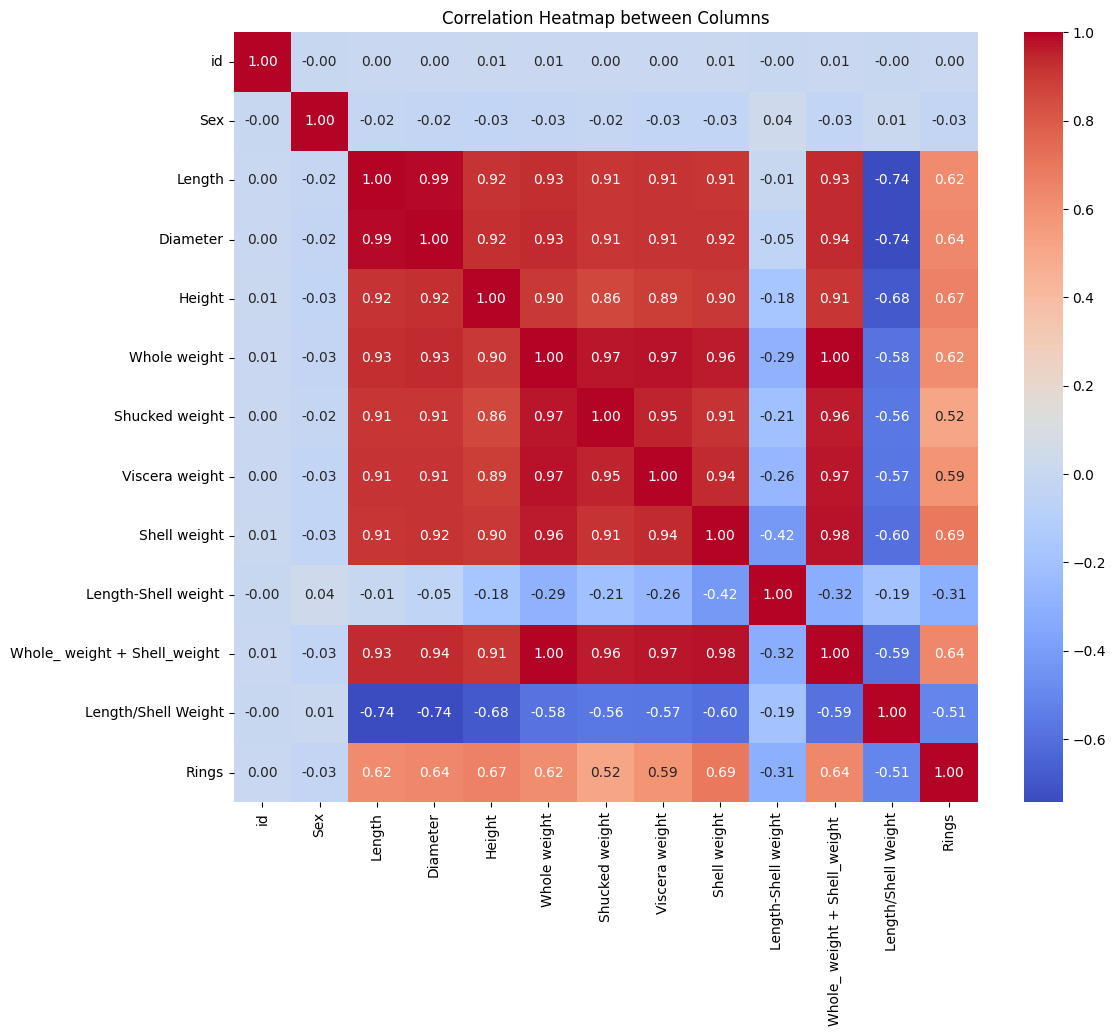

In [298]:

df.head()
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# Assuming df is your DataFrame
# Calculate the correlation matrix between all columns
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Columns')
plt.show()

We can see that there is an extremely high correlation between length and the diametre.
Negative correlation between Sex and Ring, rest all postive. 

Outliers : 
Lets see the outliers in the data.

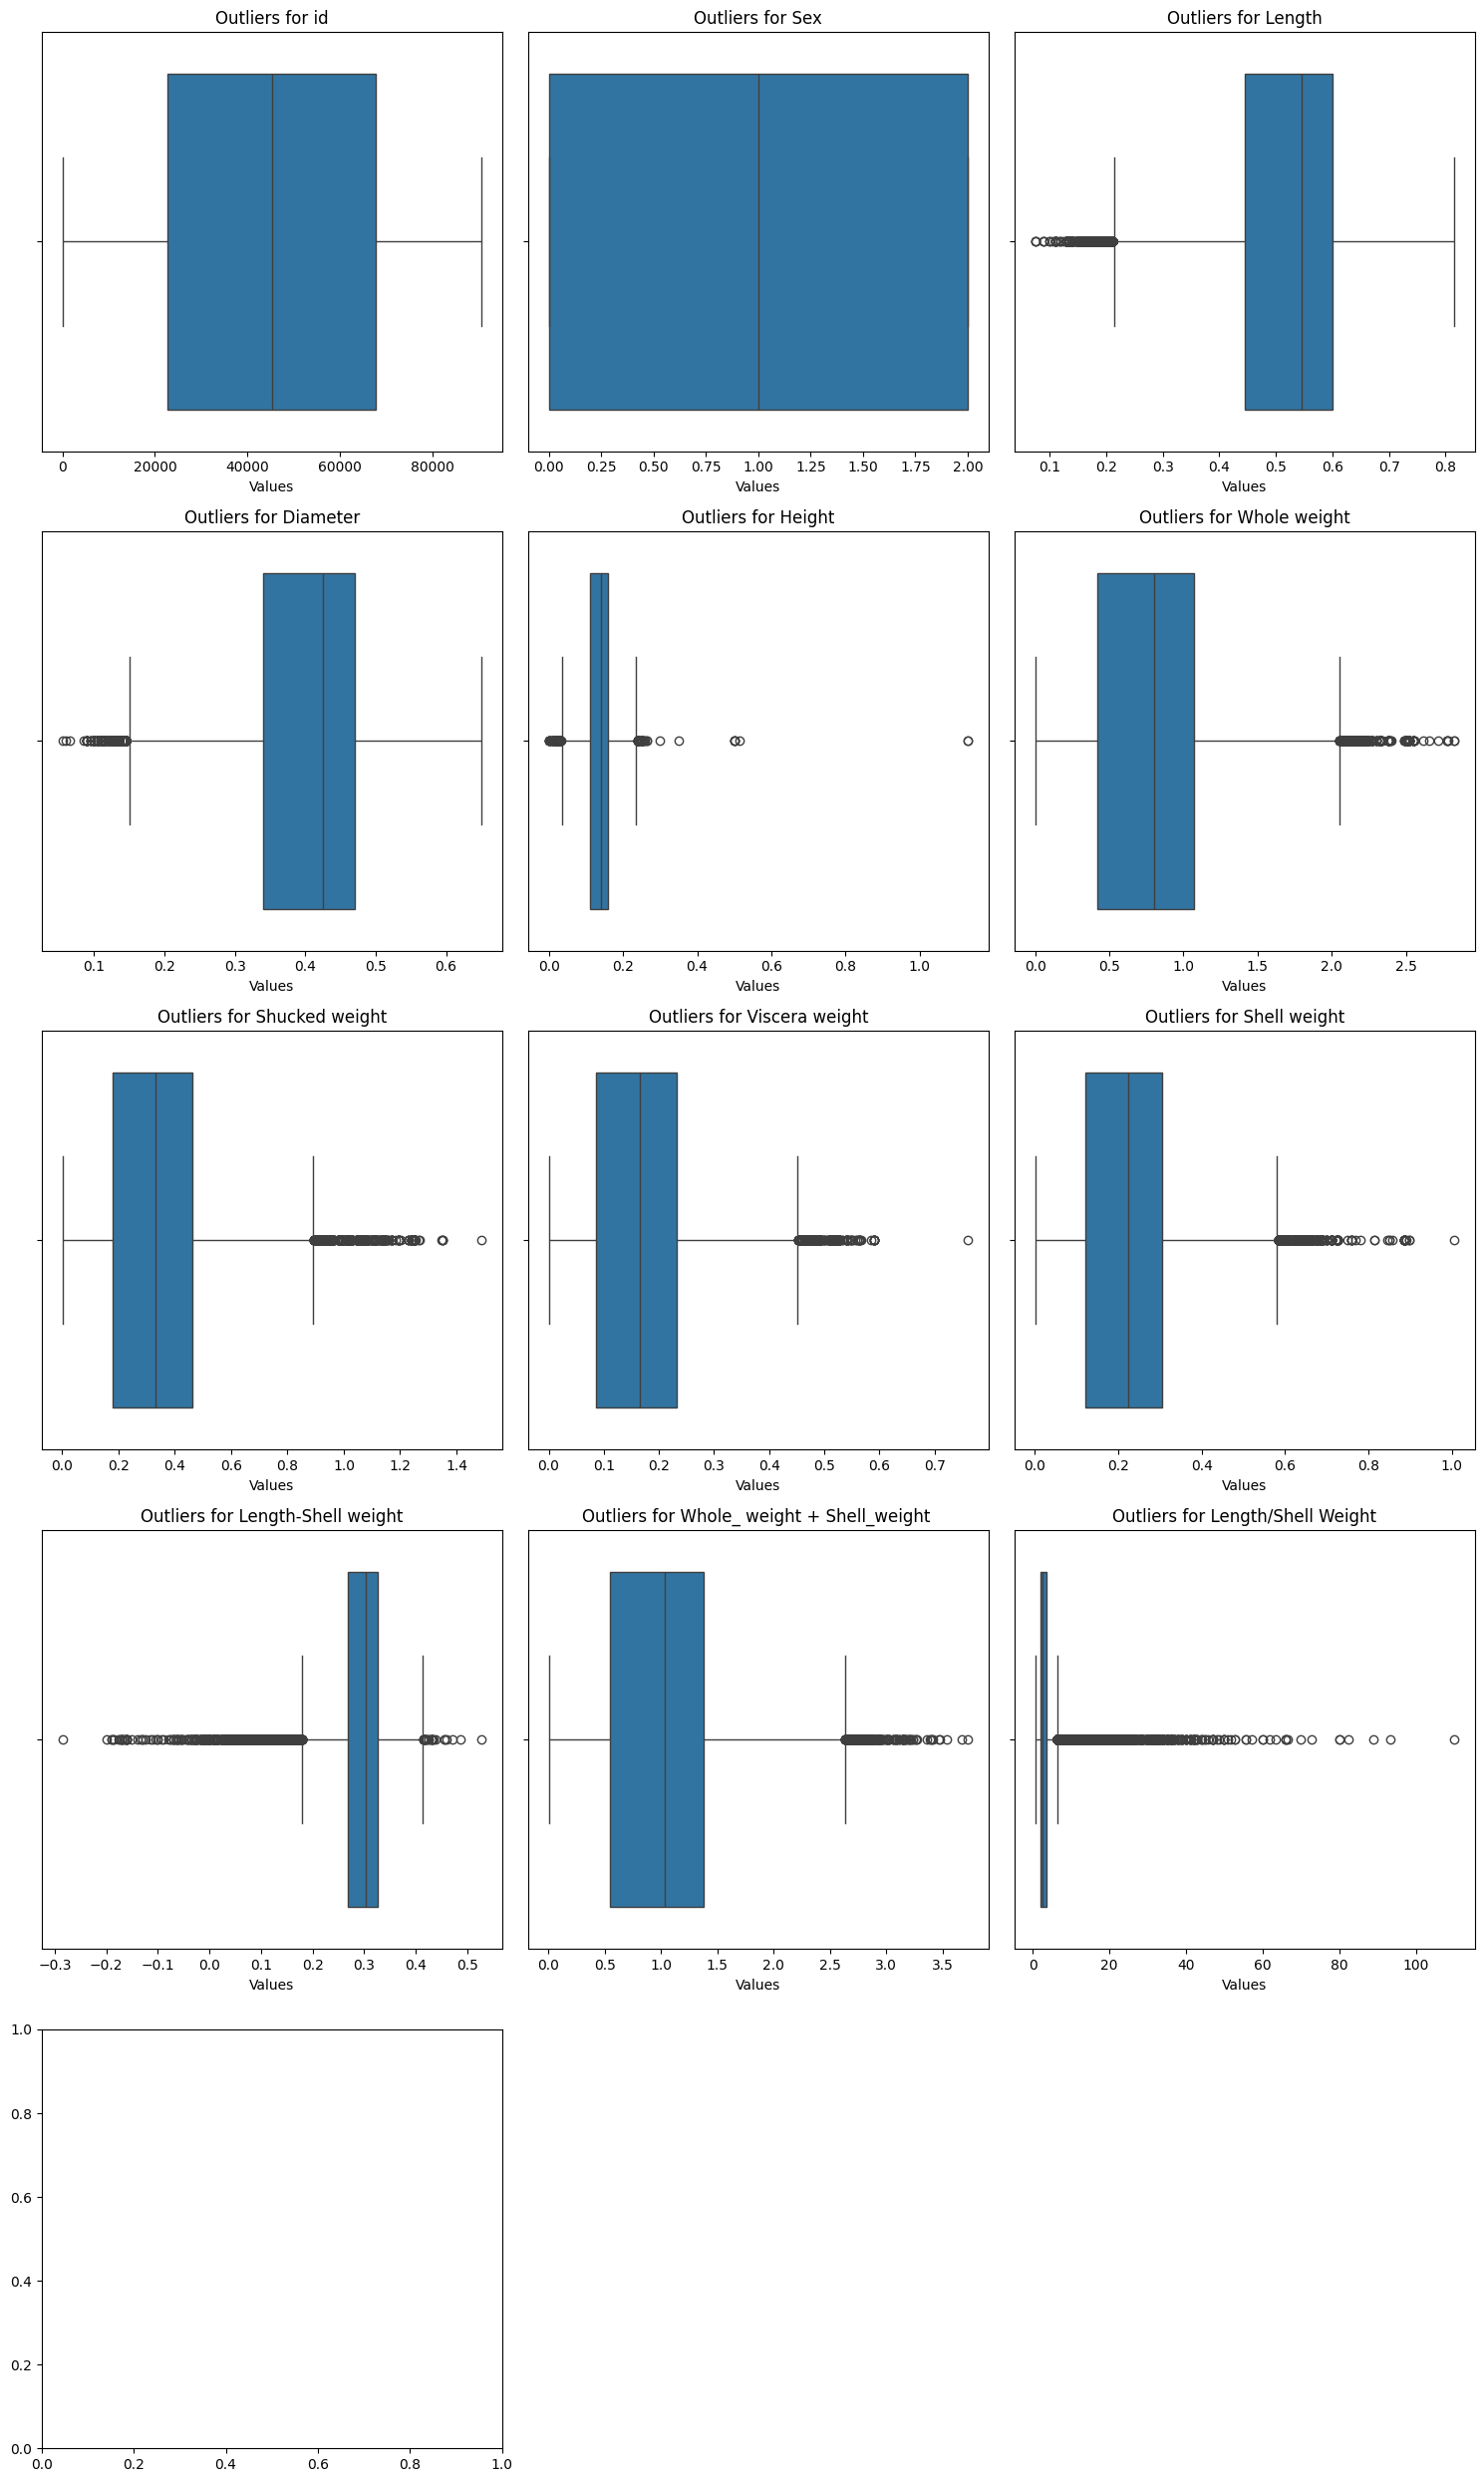

In [299]:
num_cols = 3
num_features = len(df.columns)

num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train.columns):
    sns.boxplot(data=X_train[feature], ax=axes[i], orient='h')  
    axes[i].set_title(f'Outliers for {feature}')
    axes[i].set_xlabel('Values')

#plot it for the column rings  also 
sns.boxplot(data=y_train, ax=axes[-1], orient='h')
axes[-1].set_title('Outliers for Rings')
axes[-1].set_xlabel('Values')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

We can see that there are outlier in each feature 
so we can remove the outliers as follows

In [300]:
#remove the outlier from each of the feature using IQP method
from scipy import stats
import numpy as np
#remove outliers using IQR method 
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#now call this function for each of the column in X_train 
#remove the samples corresponding to outliers in X_train and y_train 
for col in X_train.columns:
    X_train = remove_outliers_iqr(X_train, col)
    y_train = y_train[X_train.index]
    
#remove the outlier of y_train  adn the corresponding outlier in x_train 


#now plot the box plot again to see the outliers


RMSLE 0.3187156798669895
Mean Absolute Error 1.518428912404799


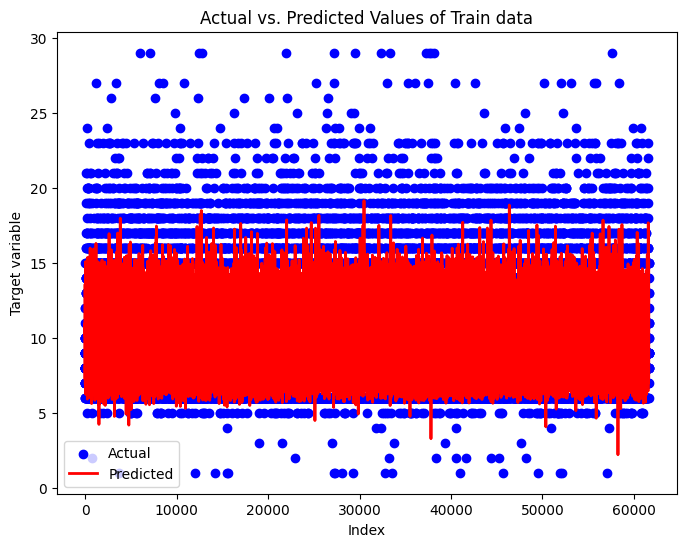

In [301]:
# first fit a classic linear regression model (polynomial regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
linearreg= LinearRegression()
linearreg.fit(X_train,y_train)
y_pred= linearreg.predict(X_test)
y_pred= np.maximum(y_pred,0)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
absolute_error= mean_absolute_error(y_test,y_pred)
print("RMSLE" ,rmsle)
RMSE_values['LinearRegression']=rmsle
print("Mean Absolute Error",absolute_error)
abs_values['LinearRegression']=absolute_error

y_pred= linearreg.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values of Train data')
plt.legend()
plt.show()


There are outliers in the data due to which we see that linear regression does not perform very well 

In [252]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
#use Xgb model
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

# Ensure predictions are non-negative before applying logarithm
y_pred = np.maximum(y_pred, 0)
absolute_error= mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error",absolute_error)
abs_values["XGBoosting"]=absolute_error
# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE:", rmsle)
RMSE_values['XGBoosting']=rmsle



Mean Absolute Error 1.3672391644365074
RMSLE: 0.1768045630514604


In [302]:
param_grid= {
    'n_estimators':[10,50,100,600], # no of trees 
    'learning_rate':[0.001,0.01,0.04], # the learning rate 
    'max_depth':[3,5,7]
}
from sklearn.model_selection import GridSearchCV
gbr2= GridSearchCV(xg_reg,param_grid,cv=3,n_jobs=-1)
gbr2.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.04],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 600]})

In [303]:
y_pred= gbr2.predict(X_test)
feature_importance = gbr2.best_estimator_.feature_importances_
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
abs_val= mean_absolute_error(y_test,y_pred)
abs_values['XGBoosting']=abs_val
RMSE_values['XGBoosting']=rmsle
print("RMSLE VALUES",rmsle)

RMSLE VALUES 0.16764911550394837


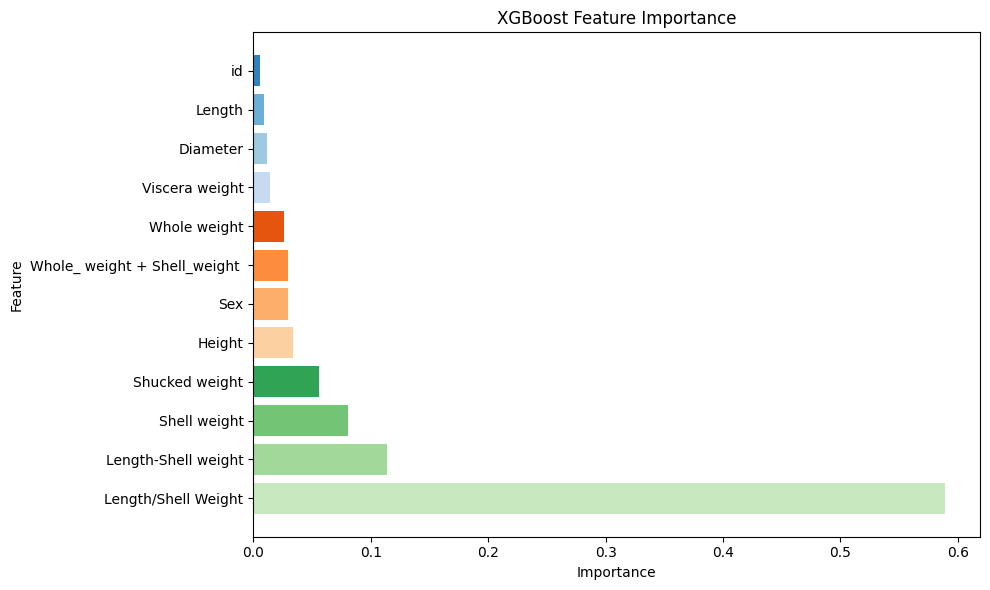

In [304]:
feature_names = X_train.columns

sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(sorted_features)]  
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()  
plt.show()
# plot a graph between the predicted values as red and the actual values as blue for xgb model 


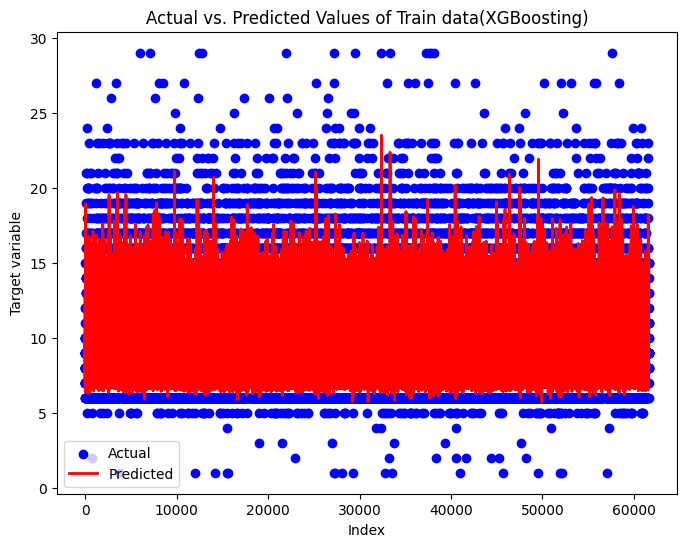

In [306]:
y_pred= gbr2.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values of Train data(XGBoosting)')
plt.legend()
plt.show()

In [308]:
# now use a random forest regression 
from sklearn.ensemble import RandomForestRegressor

# Load or create your data
# X_train, y_train = ...

# Create and train the RandomForest model do a hyperparametre tuning of random forest model 
HyperParameters={
    'n_estimators':[10,50,100,600], # no of trees 
    'max_depth':[3,5,7]

}
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

rf_model_best = GridSearchCV(rf_model,HyperParameters,cv=3,n_jobs=-1)
rf_model_best.fit(X_train,y_train)

# Predict on new data
y_pred = rf_model_best.predict(X_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
abs_error= mean_absolute_error(y_test,y_pred)
print("Absolute error ",abs_error)
abs_values['RandomForest']=abs_error
print("RMSLE VALUES",rmsle)
RMSE_values['RandomForest']=rmsle

Absolute error  1.3841193092394541
RMSLE VALUES 0.17604627957337862


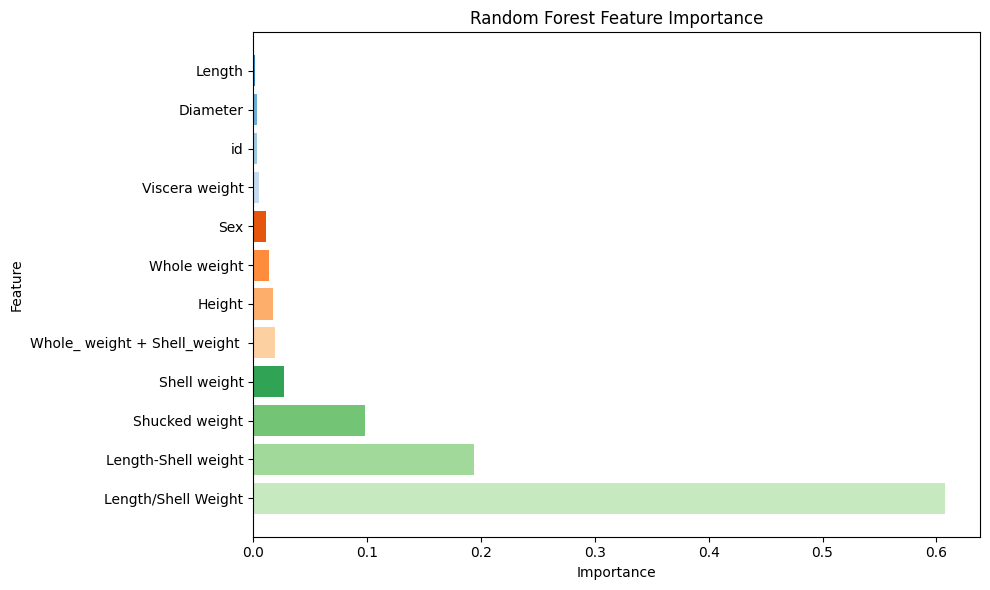

In [309]:
#plot the feature_importance of the Random Forest model 
feature_importance = rf_model_best.best_estimator_.feature_importances_
feature_names = X_train.columns
#plot it 
sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]
#plot 
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(sorted_features)]
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


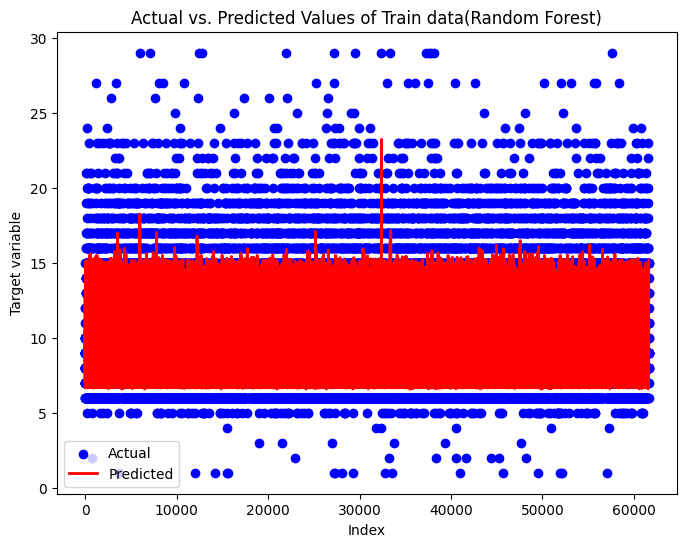

In [310]:
y_pred= rf_model_best.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values of Train data(Random Forest)')
plt.legend()
plt.show()

In [1]:
!pip install -q -U keras-tuner

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [342]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras_tuner import HyperParameters
from tensorflow import keras
#the model which is being built should be normalized 
def create_model(hp):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    hp_layer_1 = hp.Int('layer1', min_value=32, max_value=512, step=32)
    hp_layer_2 = hp.Int('layer2', min_value=32, max_value=512, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Dense(units=hp_layer_1, activation=hp_activation))
    model.add(Dense(units=hp_layer_2, activation=hp_activation))
    model.add(Dense(1, activation='linear'))

    optimizer = optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [1]:
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you'll have keras 3.3.3 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you'll have ml-dtypes 0.3.2 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you'll have tensorboard 2.16.2 which is incompatible.
You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [343]:
stop_early= keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [344]:
import keras_tuner as kt
tuner= kt.Hyperband(create_model, objective='val_loss', max_epochs=10, project_name='abalone', factor=3, directory='my_dir', overwrite=True)


C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [345]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])


Trial 30 Complete [00h 00m 29s]
val_loss: 7.414539813995361

Best val_loss So Far: 7.3999714851379395
Total elapsed time: 00h 08m 02s


In [346]:
from sklearn.metrics import mean_squared_log_error
best_hyp= tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hyp)
#now fit this model on the x_test data and calculate rmsle on the y_test data

model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])
y_pred_nn = model.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_nn))
print("RMSLE" ,rmsle)
RMSE_values['NeuralNetwork']=rmsle
abs_values['NeuralNetwork']=mean_absolute_error(y_test,y_pred_nn)
print("Mean Absolute Error",abs_values['NeuralNetwork'])



Epoch 1/10


C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 14.6230 - val_loss: 7.4117
Epoch 2/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4295 - val_loss: 7.4030
Epoch 3/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4318 - val_loss: 7.4004
Epoch 4/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4340 - val_loss: 7.4005
Epoch 5/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4335 - val_loss: 7.4007
Epoch 6/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4317 - val_loss: 7.4019
Epoch 7/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4313 - val_loss: 7.4036
Epoch 8/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.4298 - val_loss: 7.4046
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RMSLE 0.2896203636127771
Mean Absolute Error 2.322700217222329


1926/1926 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


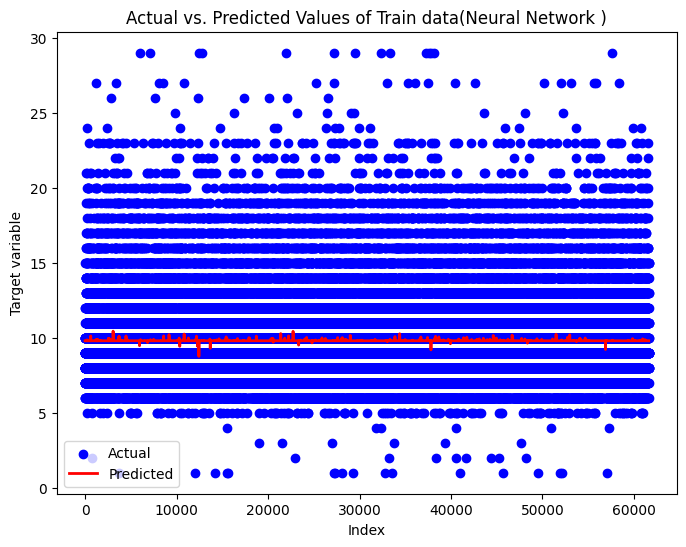

In [347]:
y_pred= model.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values of Train data(Neural Network )')
plt.legend()
plt.show()

In [321]:
#use a catboost model with hyperparametre tuning 
from catboost import CatBoostRegressor

param_grid= {
    'n_estimators':[10,50,100,600], # no of trees 
    'learning_rate':[0.001,0.01,0.04], # the learning rate 
    'max_depth':[3,5,7]
}
model = CatBoostRegressor()
model.fit(X_train, y_train)
best_model = GridSearchCV(model,param_grid,cv=3,n_jobs=-1)
best_model.fit(X_train,y_train)
y_pred_cat = best_model.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_cat))
print("RMSLE" ,rmsle)
val= mean_absolute_error(y_test,y_pred_cat)
abs_values['CatBoost']=val
RMSE_values['CatBoost']=rmsle
print(val)

Learning rate set to 0.078515
0:	learn: 2.6286580	total: 20.1ms	remaining: 20.1s
1:	learn: 2.5509254	total: 30ms	remaining: 15s
2:	learn: 2.4801911	total: 41.1ms	remaining: 13.7s
3:	learn: 2.4199770	total: 50.6ms	remaining: 12.6s
4:	learn: 2.3643599	total: 59.9ms	remaining: 11.9s
5:	learn: 2.3154767	total: 68.7ms	remaining: 11.4s
6:	learn: 2.2753952	total: 76.9ms	remaining: 10.9s
7:	learn: 2.2377244	total: 84.2ms	remaining: 10.4s
8:	learn: 2.2038277	total: 91ms	remaining: 10s
9:	learn: 2.1754871	total: 98.1ms	remaining: 9.71s
10:	learn: 2.1493620	total: 107ms	remaining: 9.65s
11:	learn: 2.1261363	total: 117ms	remaining: 9.61s
12:	learn: 2.1050016	total: 124ms	remaining: 9.42s
13:	learn: 2.0856278	total: 133ms	remaining: 9.39s
14:	learn: 2.0692966	total: 140ms	remaining: 9.19s
15:	learn: 2.0546698	total: 147ms	remaining: 9.01s
16:	learn: 2.0413739	total: 154ms	remaining: 8.92s
17:	learn: 2.0286739	total: 162ms	remaining: 8.82s
18:	learn: 2.0172295	total: 170ms	remaining: 8.76s
19:	learn

74:	learn: 1.8699552	total: 599ms	remaining: 7.39s
75:	learn: 1.8684362	total: 608ms	remaining: 7.4s
76:	learn: 1.8675346	total: 616ms	remaining: 7.39s
77:	learn: 1.8668670	total: 624ms	remaining: 7.38s
78:	learn: 1.8662680	total: 631ms	remaining: 7.36s
79:	learn: 1.8653108	total: 639ms	remaining: 7.35s
80:	learn: 1.8646562	total: 646ms	remaining: 7.33s
81:	learn: 1.8638157	total: 654ms	remaining: 7.32s
82:	learn: 1.8626164	total: 663ms	remaining: 7.32s
83:	learn: 1.8621389	total: 671ms	remaining: 7.32s
84:	learn: 1.8614376	total: 678ms	remaining: 7.3s
85:	learn: 1.8610079	total: 686ms	remaining: 7.29s
86:	learn: 1.8601559	total: 694ms	remaining: 7.28s
87:	learn: 1.8594219	total: 701ms	remaining: 7.27s
88:	learn: 1.8588927	total: 710ms	remaining: 7.27s
89:	learn: 1.8580225	total: 718ms	remaining: 7.26s
90:	learn: 1.8573099	total: 726ms	remaining: 7.25s
91:	learn: 1.8567416	total: 734ms	remaining: 7.24s
92:	learn: 1.8562097	total: 740ms	remaining: 7.22s
93:	learn: 1.8556543	total: 749ms

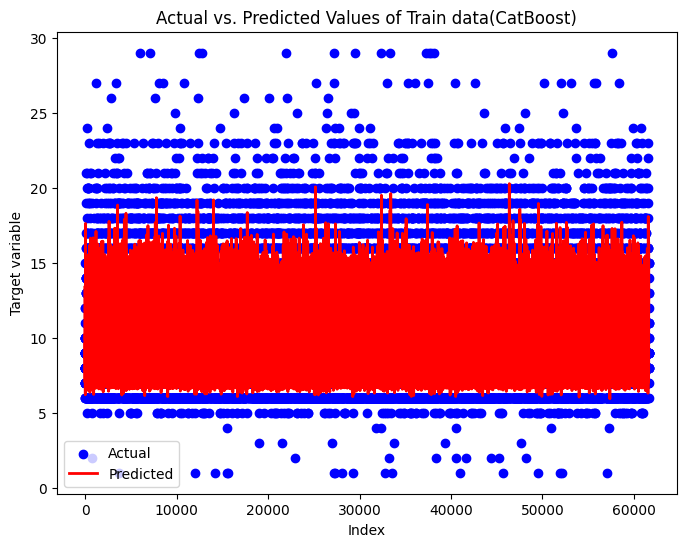

In [322]:
y_pred= best_model.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.plot(range(len(y_train)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values of Train data(CatBoost)')
plt.legend()
plt.show()

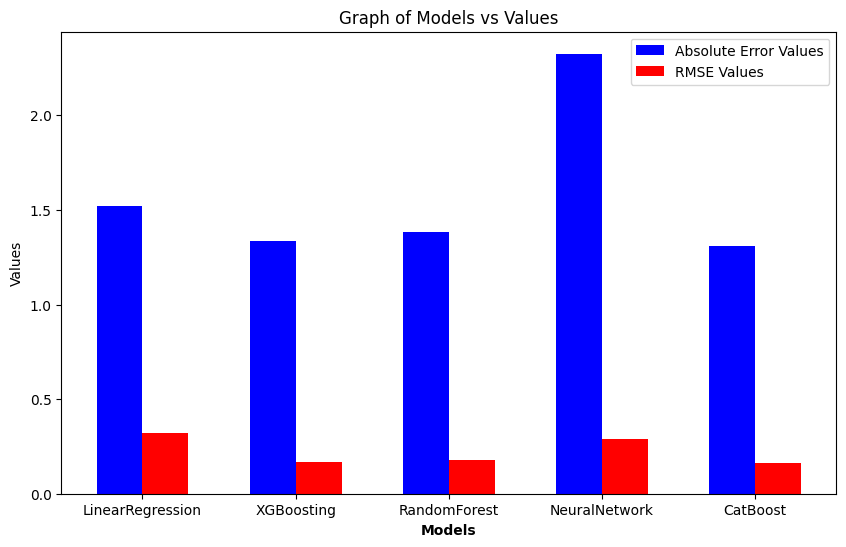

In [323]:
keys = list(abs_values.keys())
abs_values_list = list(abs_values.values())
rmse_values_list = list(RMSE_values.values())


width = 0.3


r1 = np.arange(len(keys)) 
r2 = [x + width for x in r1]  

plt.figure(figsize=(10, 6))


plt.bar(r1, abs_values_list, width=width, color='b', label='Absolute Error Values')
plt.bar(r2, rmse_values_list, width=width, color='r', label='RMSE Values')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values')
plt.title('Graph of Models vs Values')


plt.xticks([r + width / 2 for r in range(len(abs_values_list))], keys)

# Create legend & Show graphic
plt.legend()
plt.show()

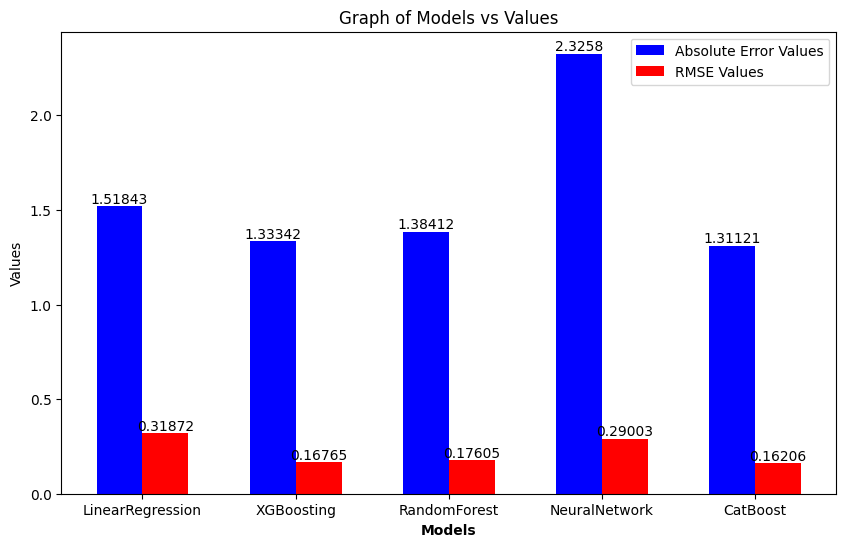

In [324]:
keys = list(abs_values.keys())
abs_values_list = list(abs_values.values())
rmse_values_list = list(RMSE_values.values())


width = 0.3


r1 = np.arange(len(keys))  
r2 = [x + width for x in r1]  

plt.figure(figsize=(10, 6))

# Plot the bars
bars1 = plt.bar(r1, abs_values_list, width=width, color='b', label='Absolute Error Values')
bars2 = plt.bar(r2, rmse_values_list, width=width, color='r', label='RMSE Values')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values')
plt.title('Graph of Models vs Values')

# Function to add value annotations on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 round(height, 5), ha='center', va='bottom')

# Call the function for the two groups of bars
add_value_labels(bars1)
add_value_labels(bars2)

# Add xticks on the middle of the grouped bars
plt.xticks([r + width / 2 for r in range(len(abs_values_list))], keys)

# Create legend & Show graphic
plt.legend()
plt.show()

Now using ensembled learning to use the best 2 models to predict the final output. 

In [266]:
y_pred_nn =y_pred_nn.reshape(-1,1)
y_pred_cat =y_pred_cat.reshape(-1,1)
ensembled_predictions= np.mean([y_pred_nn,y_pred_cat],axis=0)
rmsle = np.sqrt(mean_squared_log_error(y_test, ensembled_predictions))
print("RMSLE",rmsle)
absolute_error= mean_absolute_error(y_test,ensembled_predictions)
print("Mean Absolute Error",absolute_error)


RMSLE 0.21959681196664765
Mean Absolute Error 1.704315207013227


Another Dataset -Working on Original Dataset from laborartory 


In [325]:
import pandas as pd

# Define column names
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Load the data
df2 = pd.read_csv('abalone.data', header=None, names=column_names)
#do a labelencoding of df2 sex column
label_encoder = LabelEncoder()
#do encoding of sex column 
df2['Sex'] = label_encoder.fit_transform(df2['Sex'])
#print the number of samples in df2 and in df1
print(len(df2))
#remove the id column from df
#df2.drop('id',axis=1,inplace=True)
print(df2.head())


4177
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [326]:
#remove null values from df2
#count number of null values from df2 
print(df2.isnull().sum())
# no null value 

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [327]:


X2=df2.iloc[:,:-1]
y2=df2.iloc[:,-1]
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=10)
print(len(y_train2))
print(len(X_train2))
print(X_train2.columns)
df2.describe()

3341
3341
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [134]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


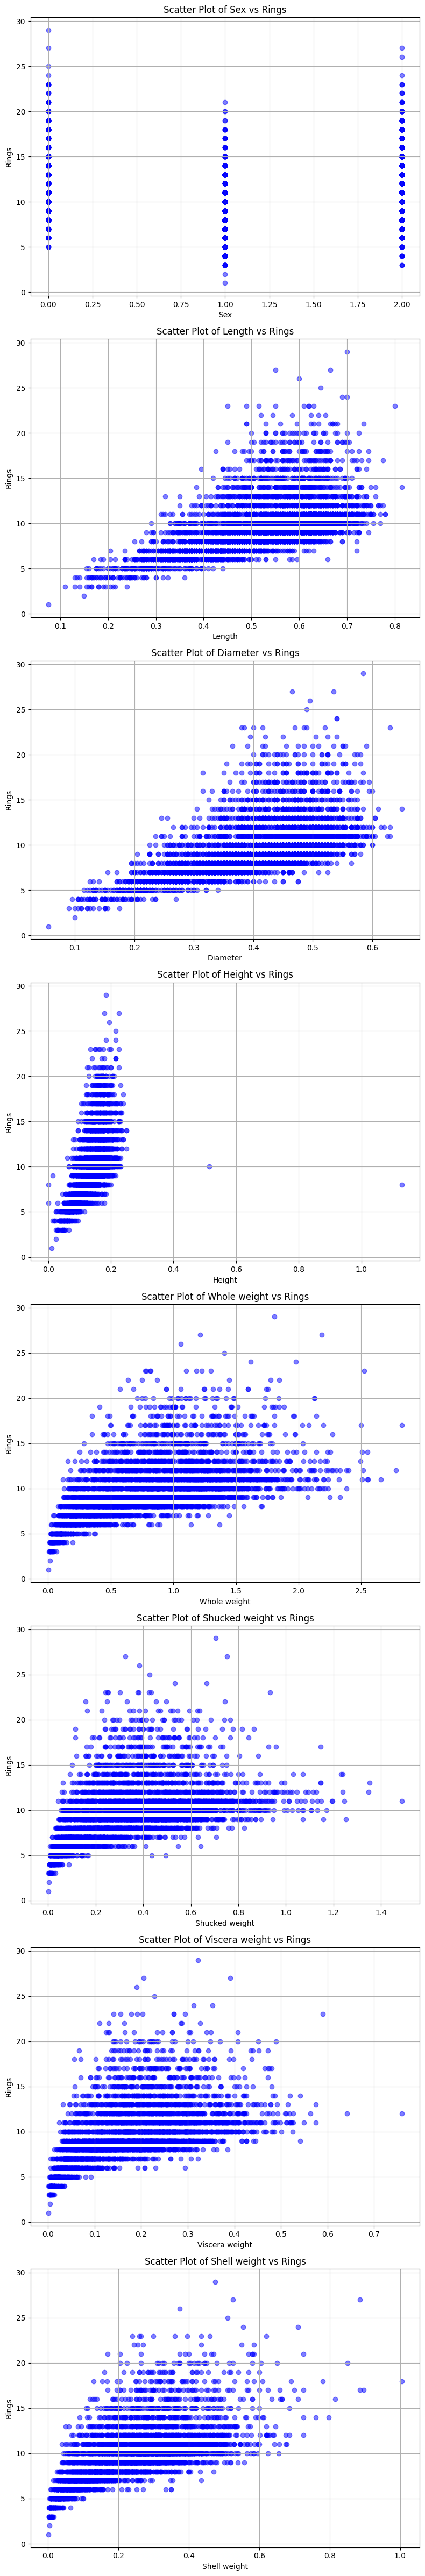

In [328]:
#now observe the scatter plots of X_train2 wrt to the target variable y_train2
variables_to_plot = [ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight','Shucked weight','Viscera weight' , 'Shell weight']
#plot the scatterplots for each of these variables
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(8, 6*len(variables_to_plot)))
#plot it
for i, var in enumerate(variables_to_plot):
    axes[i].scatter(df2[var], df2['Rings'], color='blue', alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {var} vs Rings')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rings')
    axes[i].grid(True)
plt.tight_layout()
plt.show()

                         

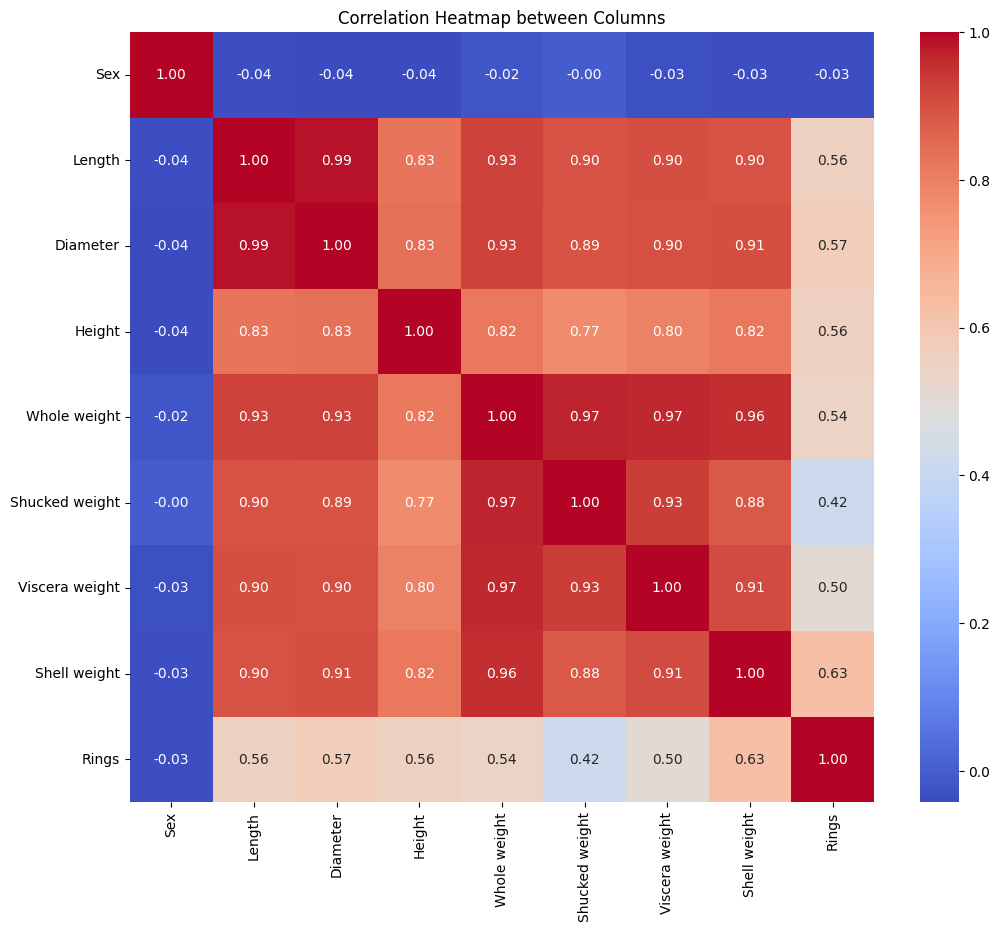

In [270]:
# now plot the correlation heatmap of df2
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Columns')
plt.show()
RMSLE_values2={}
abs_val2={}



Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
RMSLE 0.18939713573120825
Mean Absolute Error 1.577979735915541


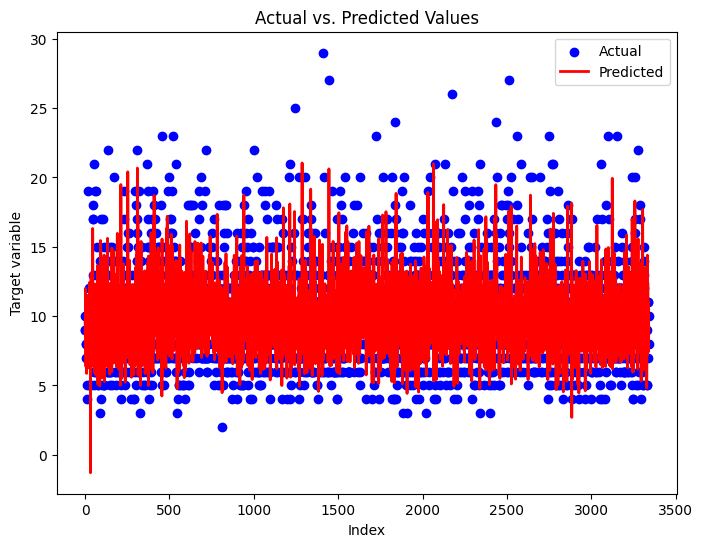

In [271]:
# first fit a classic linear regression model (polynomial regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
print(df2.columns)
linearreg2= LinearRegression()
linearreg2.fit(X_train2,y_train2)
y_pred= linearreg2.predict(X_test2)
#check if y_pred contains a negative element or no t
y_pred= np.maximum(y_pred,0)

rmsle = np.sqrt(mean_squared_log_error(y_test2, y_pred))
absolute_error= mean_absolute_error(y_test2,y_pred)
print("RMSLE" ,rmsle)
RMSLE_values2['LinearRegression']=rmsle
print("Mean Absolute Error",absolute_error)
abs_val2['LinearRegression']=absolute_error
y_pred= linearreg2.predict(X_train2)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train2)), y_train2, color='blue', label='Actual')
plt.plot(range(len(y_train2)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [138]:
pip install bayesian-optimization 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [329]:
#now fit a xgboost model on the data with the same hyperparametre tuning as before 
from xgboost import XGBRegressor
import xgboost
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
#use Xgb model
#make three such models and use ensemble learning to predict the output 

param_grid = {
    'n_estimators': [10, 50, 100, 600],  # no of trees 
    'learning_rate': [0.001, 0.01, 0.04],  # the learning rate 
    'max_depth': [3, 5, 7]
}

xg_reg = XGBRegressor()
xg_reg.fit(X_train2, y_train2)
xg_reg1= GridSearchCV(xg_reg,param_grid,cv=3,n_jobs=-1)
xg_reg1.fit(X_train2,y_train2)
y_pred = xg_reg.predict(X_test2)
y_pred1= np.maximum(y_pred, 0)
# Ensure predictions are non-negative before applying logarithm
y_pred = np.maximum(y_pred, 0)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test2, y_pred))
print("RMSLE:", rmsle)
RMSLE_values2['XGBoosting']=rmsle

#now apply hyperparametre tuning 
#from sklearn.model_selection import GridSearchCV
#gbr2= GridSearchCV(xg_reg,param_grid,cv=3,n_jobs=-1)
#gbr2.fit(X_train2,y_train2)
#find the best parametres and use that on X_test2
#y_pred1= gbr2.predict(X_test2)

#feature_importance = gbr2.best_estimator_.feature_importances_
#rmsle=np.sqrt(mean_squared_log_error(y_test2,y_pred))
#abs_val= mean_absolute_error(y_test2,y_pred)
abs_val2['XGBoosting']=abs_val
RMSLE_values2['XGBoosting']=rmsle
print("Absolute error ",abs_val)
print("RMSLE VALUES",rmsle)


RMSLE: 0.18125393550458282
Absolute error  1.333416474389759
RMSLE VALUES 0.18125393550458282


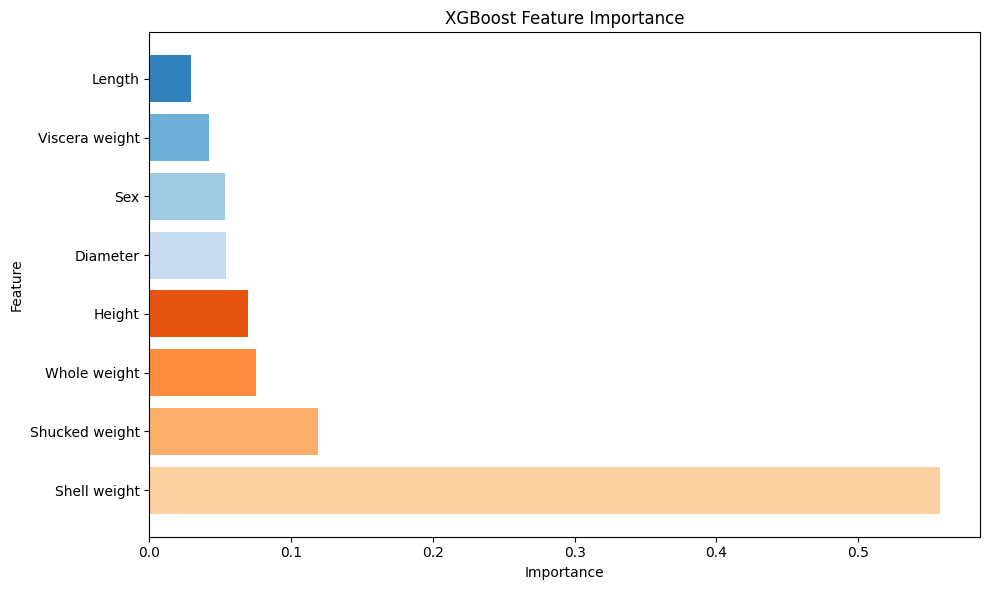

In [330]:
feature_names = X_train2.columns
#feature_importance 
feature_importance = xg_reg1.best_estimator_.feature_importances_

sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(sorted_features)]  
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()  
plt.show()

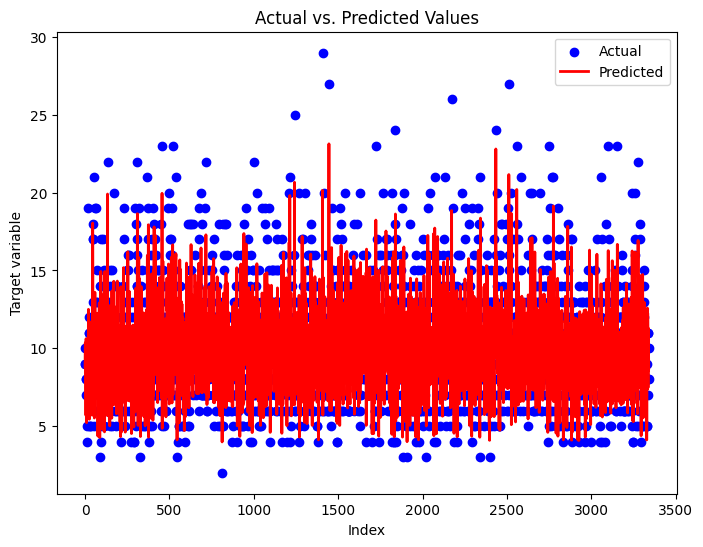

In [331]:
y_pred= xg_reg1.predict(X_train2)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train2)), y_train2, color='blue', label='Actual')
plt.plot(range(len(y_train2)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [332]:
# now use a random forest regression 
from sklearn.ensemble import RandomForestRegressor

# Load or create your data
# X_train, y_train = ...

# Create and train the RandomForest model do a hyperparametre tuning of random forest model 
HyperParameters={
    'n_estimators':[10,50,100,600], # no of trees 
    'max_depth':[3,5,7]

}
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor()
rf_model.fit(X_train2,y_train2)

rf_model_best = GridSearchCV(rf_model,HyperParameters,cv=3,n_jobs=-1)
rf_model_best.fit(X_train2,y_train2)

# Predict on new data
y_pred = rf_model_best.predict(X_test2)
rmsle=np.sqrt(mean_squared_log_error(y_test2,y_pred))
abs_val= mean_absolute_error(y_test2,y_pred)
print("Absolute error ",abs_val)
abs_val2['RandomForest']=abs_val
print("RMSLE VALUES",rmsle)
RMSLE_values2['RandomForest']=rmsle

Absolute error  1.4571908281920294
RMSLE VALUES 0.16888707958172589


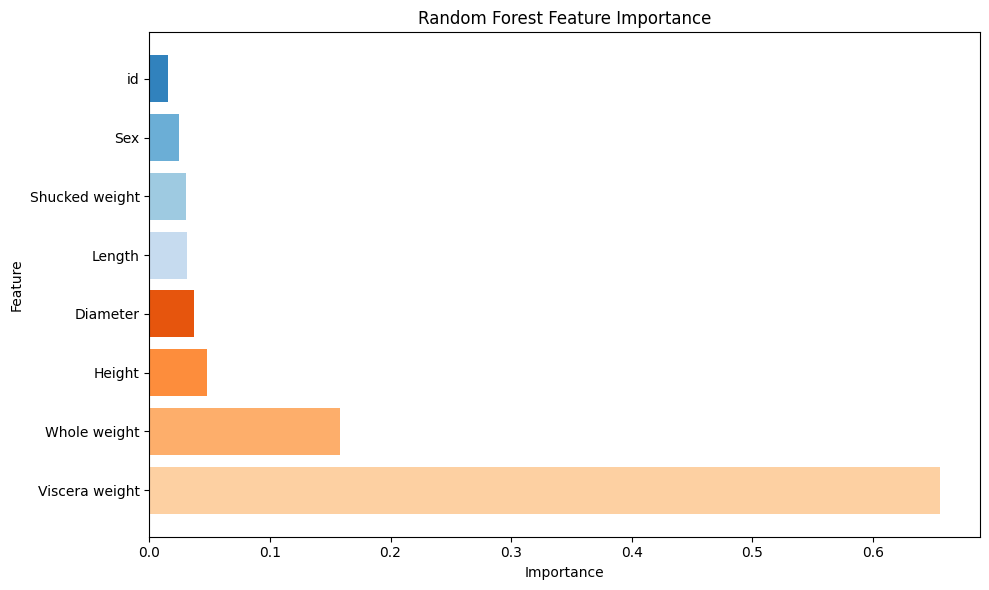

In [333]:
#plot the feature_importance of the Random Forest model 
feature_importance = rf_model_best.best_estimator_.feature_importances_
feature_names = X_train.columns
#plot it 
sorted_indices = feature_importance.argsort()
sorted_importance = feature_importance[sorted_indices]
sorted_features = feature_names[sorted_indices]
#plot 
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors[:len(sorted_features)]
plt.barh(sorted_features, sorted_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

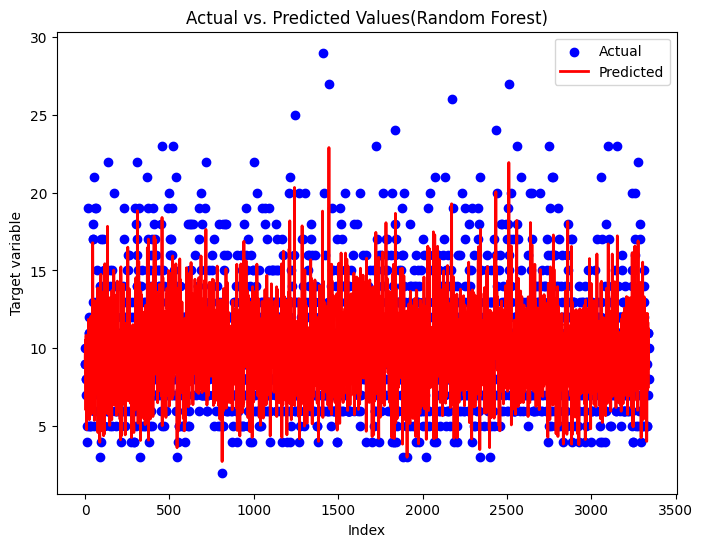

In [335]:
y_pred= rf_model_best.predict(X_train2)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train2)), y_train2, color='blue', label='Actual')
plt.plot(range(len(y_train2)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values(Random Forest)')
plt.legend()
plt.show()

In [336]:
#now fit a neural network model as before 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras_tuner import HyperParameters
from tensorflow import keras
import keras_tuner as kt

def create_model2(hp):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    hp_layer_1 = hp.Int('layer1', min_value=32, max_value=128, step=32)
    hp_layer_2 = hp.Int('layer2', min_value=32, max_value=128, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Dense(units=hp_layer_1, activation=hp_activation))
    model.add(Dense(units=hp_layer_2, activation=hp_activation))
    model.add(Dense(1, activation='linear'))

    optimizer = optimizers.Adam(learning_rate=hp_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

stop_early= keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner= kt.Hyperband(create_model2, objective='val_loss', max_epochs=10, project_name='abalone', factor=3, directory='my_dir', overwrite=True)



C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [337]:
tuner.search(X_train2, y_train2, epochs=10, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 08s]
val_loss: 4.309815883636475

Best val_loss So Far: 4.309815883636475
Total elapsed time: 00h 02m 38s


In [338]:
from sklearn.metrics import mean_squared_log_error
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)
best_hyp= tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hyp)
#now fit this model on the x_test data and calculate rmsle on the y_test data

model.fit(X_train2, y_train2, epochs=10, validation_split=0.2, callbacks=[stop_early])
y_pred = model.predict(X_test2)
rmsle = np.sqrt(mean_squared_log_error(y_test2, y_pred))
print("RMSLE" ,rmsle)
val= mean_absolute_error(y_test2,y_pred)
abs_val2['NeuralNetwork']=val
RMSLE_values2['NeuralNetwork']=rmsle
print(val)


Epoch 1/10


C:\Users\risha_l\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 62.5634 - val_loss: 7.0934
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1870 - val_loss: 6.0422
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3797 - val_loss: 5.4826
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9294 - val_loss: 5.0143
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5411 - val_loss: 4.7179
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2708 - val_loss: 4.5424
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0889 - val_loss: 4.4314
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9848 - val_loss: 4.3725
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9273 - val_loss: 4.3392
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8990 - val_loss: 4.3173
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSLE 0.17361262558366336
1.4961832616317785


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


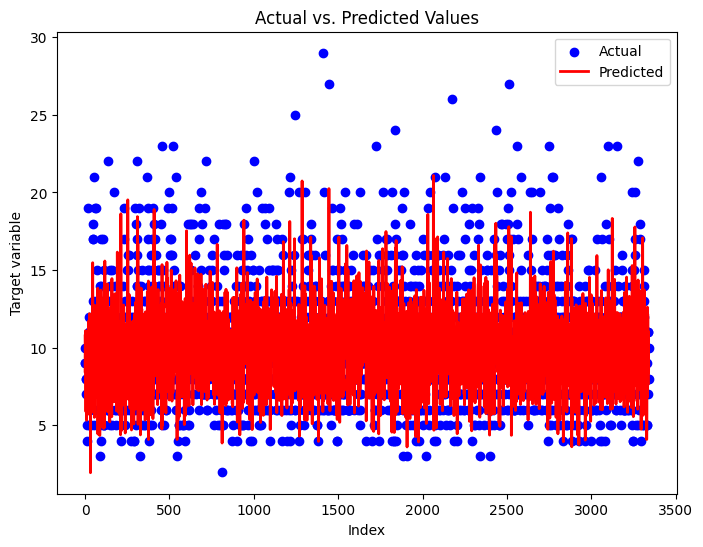

In [339]:
y_pred= model.predict(X_train2)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train2)), y_train2, color='blue', label='Actual')
plt.plot(range(len(y_train2)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [90]:
# now use catboost 
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [340]:
#use a catboost model with hyperparametre tuning 
from catboost import CatBoostRegressor

param_grid= {
    'n_estimators':[10,50,100,600], # no of trees 
    'learning_rate':[0.001,0.01,0.04], # the learning rate 
    'max_depth':[3,5,7]
}
model = CatBoostRegressor()
model.fit(X_train2, y_train2)
best_model = GridSearchCV(model,param_grid,cv=3,n_jobs=-1)
best_model.fit(X_train2,y_train2)
# Predict on new data
y_pred_cat_bost = best_model.predict(X_test2)
rmsle = np.sqrt(mean_squared_log_error(y_test2, y_pred_cat_bost))
print("RMSLE" ,rmsle)
val= mean_absolute_error(y_test2,y_pred_cat_bost)
abs_val2['CatBoost']=val
RMSLE_values2['CatBoost']=rmsle
print(val)


Learning rate set to 0.04954
0:	learn: 3.1873327	total: 3.21ms	remaining: 3.2s
1:	learn: 3.1293959	total: 5.48ms	remaining: 2.73s
2:	learn: 3.0824667	total: 9.01ms	remaining: 2.99s
3:	learn: 3.0354787	total: 12.9ms	remaining: 3.2s
4:	learn: 2.9875231	total: 15.5ms	remaining: 3.08s
5:	learn: 2.9466158	total: 17.4ms	remaining: 2.88s
6:	learn: 2.9080668	total: 20.1ms	remaining: 2.85s
7:	learn: 2.8713418	total: 23.5ms	remaining: 2.91s
8:	learn: 2.8344869	total: 25.9ms	remaining: 2.85s
9:	learn: 2.8002418	total: 27.7ms	remaining: 2.74s
10:	learn: 2.7674371	total: 29.4ms	remaining: 2.64s
11:	learn: 2.7396096	total: 31.1ms	remaining: 2.56s
12:	learn: 2.7102918	total: 32.8ms	remaining: 2.49s
13:	learn: 2.6833863	total: 35.3ms	remaining: 2.48s
14:	learn: 2.6561596	total: 37.1ms	remaining: 2.44s
15:	learn: 2.6305782	total: 39ms	remaining: 2.4s
16:	learn: 2.6096185	total: 41ms	remaining: 2.37s
17:	learn: 2.5919496	total: 42.8ms	remaining: 2.33s
18:	learn: 2.5735806	total: 44.9ms	remaining: 2.32s


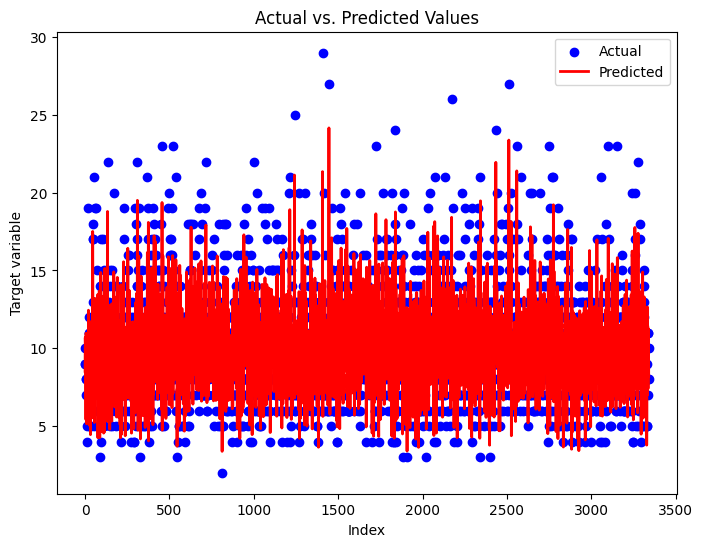

In [341]:
y_pred= best_model.predict(X_train2)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train2)), y_train2, color='blue', label='Actual')
plt.plot(range(len(y_train2)), y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [280]:
#plot RMSLE values and mean absolute values wrt to their models
keys = list(abs_val2.keys())
abs_values_list = list(abs_val2.values())
rmse_values_list = list(RMSLE_values2.values())
#plot it
width = 0.3
r1 = np.arange(len(keys))  # positions for the first group of bars
r2 = [x + width for x in r1]  # positions for the second group of bars


                    dataset1  dataset2
RMSLE               0.354438  0.189397
Mean Absolute Loss  1.569602  1.577980


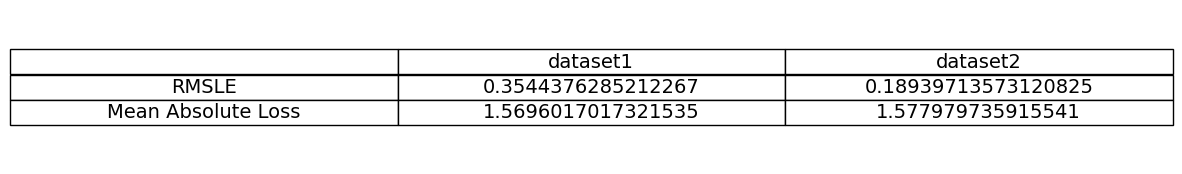

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import six
from matplotlib.table import table

# Assume that rmsle_dataset1, rmsle_dataset2, mae_dataset1, mae_dataset2 are the calculated metrics
rmsle_dataset1 = RMSE_values['LinearRegression']  # replace with actual value
rmsle_dataset2 = RMSLE_values2['LinearRegression']  # replace with actual value
mae_dataset1 =  abs_values['LinearRegression'] # replace with actual value
mae_dataset2 = abs_val2['LinearRegression'] # replace with actual value

# Create a dictionary with the data
data = {
    'dataset1': [rmsle_dataset1, mae_dataset1],
    'dataset2': [rmsle_dataset2, mae_dataset2]
}

# Create a DataFrame with the data
df3 = pd.DataFrame(data, index=['RMSLE', 'Mean Absolute Loss'])

print(df3)
#render df3 as table image 
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# Add row labels. df3.index provides the row labels
cell_text = []
for row in range(len(df3)):
    cell_text.append([df3.index[row]] + list(df3.iloc[row]))

# Add column labels. df3.columns provides the column labels
columns = [''] + list(df3.columns)

tbl = table(ax, cell_text, loc='center', cellLoc='center', colLabels=columns)

tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)
plt.show()

                    dataset1  dataset2
RMSLE               0.176374  0.181254
Mean Absolute Loss  1.358903  1.358903


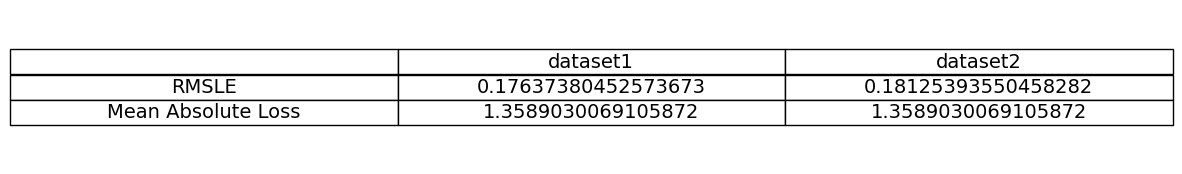

In [282]:

rmsle_dataset1 = RMSE_values['XGBoosting'] 
rmsle_dataset2 = RMSLE_values2['XGBoosting'] 
mae_dataset1 =  abs_values['XGBoosting']
mae_dataset2 = abs_val2['XGBoosting']


data = {
    'dataset1': [rmsle_dataset1, mae_dataset1],
    'dataset2': [rmsle_dataset2, mae_dataset2]
}


df3 = pd.DataFrame(data, index=['RMSLE', 'Mean Absolute Loss'])

print(df3)
#render df3 as table image 
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')


cell_text = []
for row in range(len(df3)):
    cell_text.append([df3.index[row]] + list(df3.iloc[row]))

columns = [''] + list(df3.columns)

tbl = table(ax, cell_text, loc='center', cellLoc='center', colLabels=columns)
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)
plt.show()

                    dataset1  dataset2
RMSLE               0.176087  0.168812
Mean Absolute Loss  1.390217  1.456840


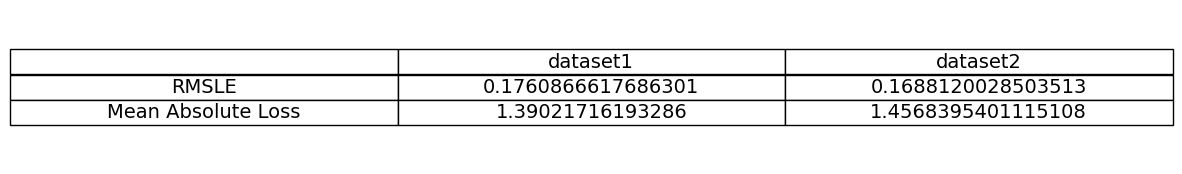

In [283]:

rmsle_dataset1 = RMSE_values['RandomForest']
rmsle_dataset2 = RMSLE_values2['RandomForest'] 
mae_dataset1 =  abs_values['RandomForest'] 
mae_dataset2 = abs_val2['RandomForest'] 

# Create a dictionary with the data
data = {
    'dataset1': [rmsle_dataset1, mae_dataset1],
    'dataset2': [rmsle_dataset2, mae_dataset2]
}

# Create a DataFrame with the data
df3 = pd.DataFrame(data, index=['RMSLE', 'Mean Absolute Loss'])

print(df3)
#render df3 as table image 
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# Add row labels. df3.index provides the row labels
cell_text = []
for row in range(len(df3)):
    cell_text.append([df3.index[row]] + list(df3.iloc[row]))

# Add column labels. df3.columns provides the column labels
columns = [''] + list(df3.columns)

tbl = table(ax, cell_text, loc='center', cellLoc='center', colLabels=columns)
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)
plt.show()

                    dataset1  dataset2
RMSLE               0.291185  0.180599
Mean Absolute Loss  2.333937  1.626840


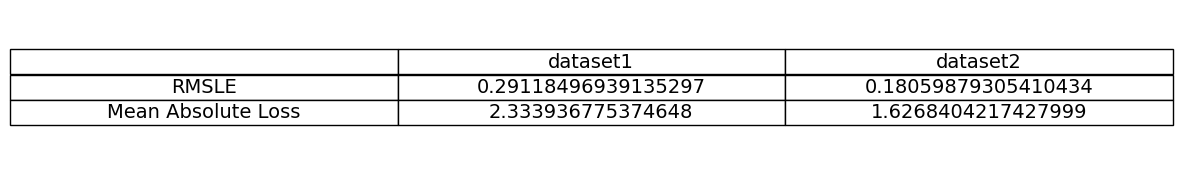

In [284]:

rmsle_dataset1 = RMSE_values['NeuralNetwork']
rmsle_dataset2=RMSLE_values2['NeuralNetwork']
mae_dataset1 =  abs_values['NeuralNetwork']
mae_dataset2 = abs_val2['NeuralNetwork'] 

# Create a dictionary with the data
data = {
    'dataset1': [rmsle_dataset1, mae_dataset1],
    'dataset2': [rmsle_dataset2, mae_dataset2]
}

# Create a DataFrame with the data
df3 = pd.DataFrame(data, index=['RMSLE', 'Mean Absolute Loss'])

print(df3)
#render df3 as table image 
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# Add row labels. df3.index provides the row labels
cell_text = []
for row in range(len(df3)):
    cell_text.append([df3.index[row]] + list(df3.iloc[row]))

# Add column labels. df3.columns provides the column labels
columns = [''] + list(df3.columns)

tbl = table(ax, cell_text, loc='center', cellLoc='center', colLabels=columns)
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)
plt.show()

                    dataset1  dataset2
RMSLE               0.171891  0.167835
Mean Absolute Loss  1.342267  1.441558


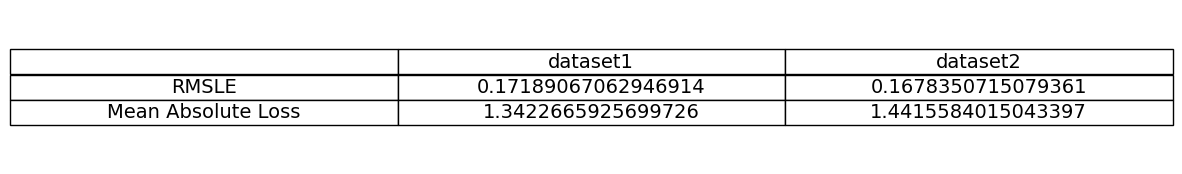

In [289]:

rmsle_dataset1 = RMSE_values['CatBoost']
rmsle_dataset2=RMSLE_values2['CatBoost']
mae_dataset1 =  abs_values['CatBoost'] 
mae_dataset2 = abs_val2['CatBoost'] 

# Create a dictionary with the data
data = {
    'dataset1': [rmsle_dataset1, mae_dataset1],
    'dataset2': [rmsle_dataset2, mae_dataset2]
}

# Create a DataFrame with the data
df3 = pd.DataFrame(data, index=['RMSLE', 'Mean Absolute Loss'])

print(df3)
#render df3 as table image 
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')

# Add row labels. df3.index provides the row labels
cell_text = []
for row in range(len(df3)):
    cell_text.append([df3.index[row]] + list(df3.iloc[row]))

# Add column labels. df3.columns provides the column labels
columns = [''] + list(df3.columns)

tbl = table(ax, cell_text, loc='center', cellLoc='center', colLabels=columns)
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.5, 1.5)
plt.show()

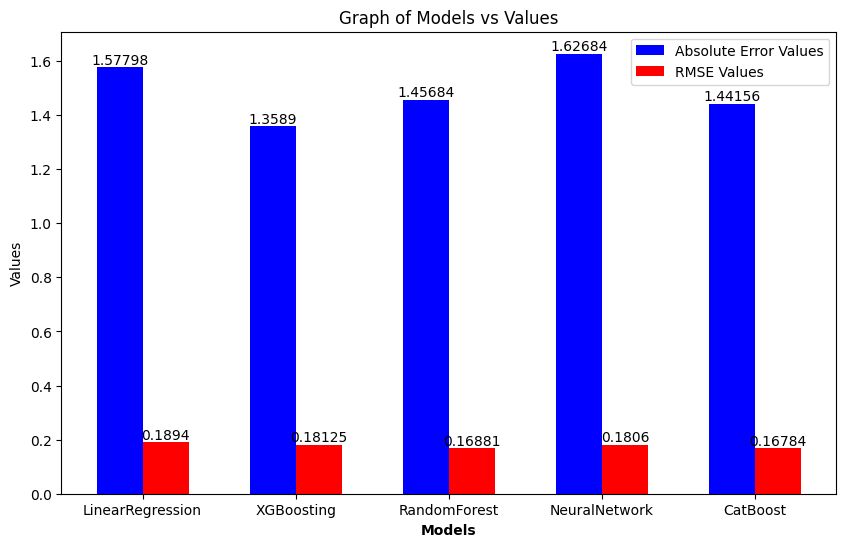

In [288]:
keys = list(abs_val2.keys())
abs_values_list = list(abs_val2.values())
rmse_values_list = list(RMSLE_values2.values())


width = 0.3
r1 = np.arange(len(keys)) 
r2 = [x + width for x in r1]  

plt.figure(figsize=(10, 6))

# Plot the bars
bars1 = plt.bar(r1, abs_values_list, width=width, color='b', label='Absolute Error Values')
bars2 = plt.bar(r2, rmse_values_list, width=width, color='r', label='RMSE Values')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values')
plt.title('Graph of Models vs Values')

# Function to add value annotations on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 round(height, 5), ha='center', va='bottom')

# Call the function for the two groups of bars
add_value_labels(bars1)
add_value_labels(bars2)

# Add xticks on the middle of the grouped bars
plt.xticks([r + width / 2 for r in range(len(abs_values_list))], keys)

# Create legend & Show graphic
plt.legend()
plt.show()